In [1]:
!pip install duckdb sqlalchemy pandas matplotlib jupyterlab jupysql

In [2]:
import duckdb
import sqlalchemy
import matplotlib.pyplot as plt
import pandas as pd

con = duckdb.connect("NTUdb")

In [3]:
engine = sqlalchemy.create_engine("duckdb:///NTUdb.db")

In [4]:
# SQL query to aggregate monthly sales
query = """
SELECT 
    DATE_TRUNC('month', order_purchase_timestamp) AS order_month,
    SUM(TOTAL_PAYMENT) AS total_sales
FROM OLIST.FCT_ORDERS
WHERE order_status = 'delivered'
GROUP BY order_month
ORDER BY order_month;
"""

In [5]:
df = con.execute(query).fetchdf()  
print(df.head())  

  order_month  total_sales
0  2016-09-01         0.00
1  2016-10-01     46566.71
2  2016-12-01        19.62
3  2017-01-01    127545.67
4  2017-02-01    271298.65


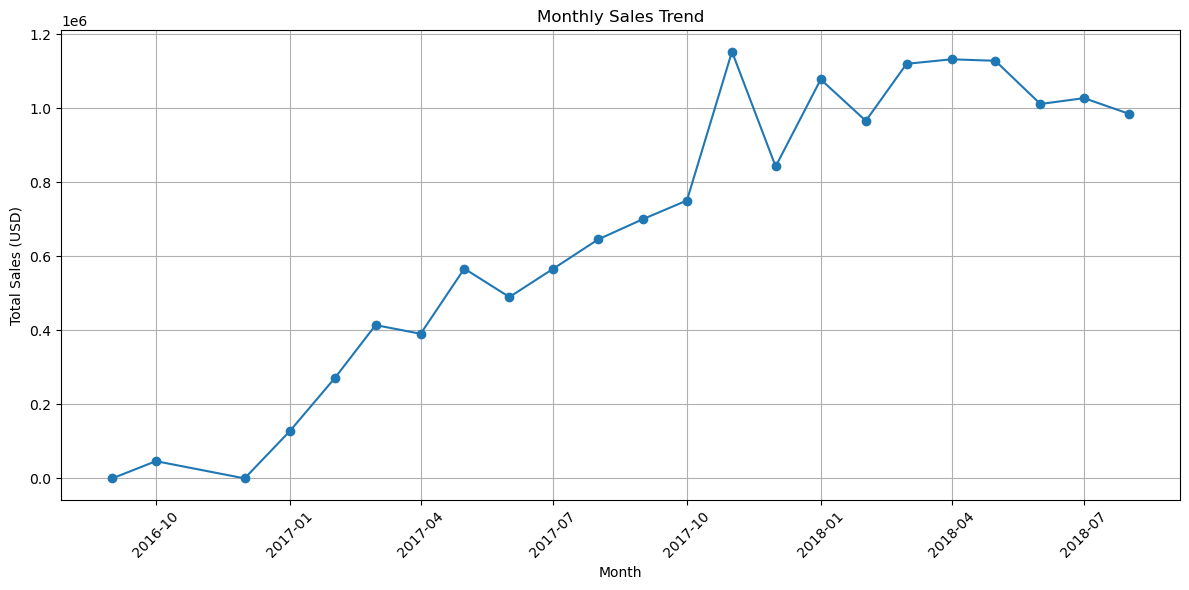

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['order_month'], df['total_sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()